<h1>
<center> Insights from City Supply and Demand Data </center></h1>

This data project has been used as a take-home assignment in the recruitment process for the data science positions at Uber.

#### Assignment
Using the provided dataset, answer the following questions:

1. Which date had the most completed trips during the two week period?
2. What was the highest number of completed trips within a 24 hour period?
3. Which hour of the day had the most requests during the two week period?
4. What percentages of all zeroes during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)? Tip: The local time value is the start of the hour (e.g. 15 is the hour from 3:00pm - 4:00pm)
5. What is the weighted average ratio of completed trips per driver during the two week period? Tip: "Weighted average" means your answer should account for the total trip volume in each hour to determine the most accurate number in whole period.
6. In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts in every 8 hours. Assume that a driver will work same shift each day.
7. True or False: Driver supply always increases when demand increases during the two week period. Tip: Visualize the data to confirm your answer if needed.
8. In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?
9. If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to? Hint: Consider both rider eyeballs and driver supply when choosing
10. True or False: There is exactly two weeks of data in this analysis
11. Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are supply and demand at both their natural minimums) Tip: Visualize the data to confirm your answer if needed.
### Data Description
To answer the question, use the dataset from the file dataset_1.csv. For example, consider the row 11 from this dataset:

Date	      Time (Local)	  Eyeballs	Zeroes	Completed Trips	Requests	Unique Drivers

2012-09-10	        16	         11	       2	     3	            4	           6
- This means that during the hour beginning at 4pm (hour 16), on September 10th, 2012, 11 people opened the Uber app (Eyeballs). 2 of them did not see any car (Zeroes) and 4 of them requested a car (Requests). Of the 4 requests, only 3 complete trips actually resulted (Completed Trips). During this time, there were a total of 6 drivers who logged in (Unique Drivers).

### Practicalities
Please work on the questions in the displayed order. Make sure that the solution reflects your entire thought process - it is more important how the code is structured rather than the final answers. You are expected to spend no more than 2-3 hours solving this project.

## Libraries

In [1]:
import numpy as np, pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

import warnings
warnings.filterwarnings('ignore')

## Load the data

In [3]:
df = pd.read_csv('dataset_1.csv')
df.sample(n=5)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
103,NaN,14,23,3,1,2,7
138,NaN,1,38,3,17,17,15
146,NaN,9,11,3,3,3,3
260,NaN,3,3,3,0,0,0
280,NaN,23,94,30,36,46,26


## Perform initial inspections on the dataset
- shape
- data types
- missing values
- duplicate values
- outliers

In [5]:
# shape
df.shape

(336, 7)

In [7]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              15 non-null     object
 1   Time (Local)      336 non-null    int64 
 2   Eyeballs          336 non-null    int64 
 3   Zeroes            336 non-null    int64 
 4   Completed Trips   336 non-null    int64 
 5   Requests          336 non-null    int64 
 6   Unique Drivers    336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB


In [9]:
# missing values
df.isnull().sum()

Date                321
Time (Local)          0
Eyeballs              0
Zeroes                0
Completed Trips       0
Requests              0
Unique Drivers        0
dtype: int64

In [17]:
df.head(25)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11
5,NaN,12,12,0,2,2,11
6,NaN,13,9,1,0,0,9
7,NaN,14,12,1,0,0,9
8,NaN,15,11,2,1,2,7
9,NaN,16,11,2,3,4,6


In [11]:
# duplicate values
df.duplicated().sum()

10

In [19]:
df[df.duplicated() == True] # They could be of different dates

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
69,NaN,4,1,1,0,0,0
118,NaN,5,1,1,0,1,0
163,NaN,2,3,3,0,1,0
189,NaN,4,1,1,0,0,0
213,NaN,4,1,1,0,0,0
236,NaN,3,2,2,0,2,0
238,NaN,5,1,1,0,0,0
262,NaN,5,1,1,0,0,0
332,NaN,3,3,3,0,1,0
333,NaN,4,1,1,0,0,0


In [21]:
# outlier detection
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
outliers_list = []

for col in numerical_features:
    Q1_df = np.percentile(df[col], 25)
    Q3_df = np.percentile(df[col], 75)
    IQR_df = Q3_df - Q1_df
    lower_bound_df = Q1_df - 1.5 * IQR_df
    upper_bound_df = Q3_df + 1.5 * IQR_df
    outliers_df = df[(df[col] < lower_bound_df) | (df[col] > upper_bound_df)].shape[0]
    
    outliers_list.append([col, outliers_df])

    outliers_df = pd.DataFrame(outliers_list, columns=['Feature', 'Num_Outliers'])

outliers_df

,Feature,Num_Outliers
0,Time (Local),0
1,Eyeballs,23
2,Zeroes,18
3,Completed Trips,32
4,Requests,36
5,Unique Drivers,8


## Data Preprocessing
- forward fill date column

In [23]:
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11


In [25]:
# we see most values of Date column NULL. Since this is time series data and is ordered, we can forward fill the Date column to reflect
# different hours of same date

df['Date'].ffill(axis=0, inplace=True)
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11


In [27]:
# missing values
df.isnull().sum()

Date                0
Time (Local)        0
Eyeballs            0
Zeroes              0
Completed Trips     0
Requests            0
Unique Drivers      0
dtype: int64

In [29]:
# duplicate values
df.duplicated().sum()

0

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              336 non-null    object
 1   Time (Local)      336 non-null    int64 
 2   Eyeballs          336 non-null    int64 
 3   Zeroes            336 non-null    int64 
 4   Completed Trips   336 non-null    int64 
 5   Requests          336 non-null    int64 
 6   Unique Drivers    336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB


### Q1: Which date had the most completed trips during the two week period?

In [33]:
df.groupby('Date').agg(Total_Completed=('Completed Trips ','sum')).reset_index().sort_values(by='Total_Completed', ascending=False).head(1)

,Date,Total_Completed
12,22-Sep-12,248


#### Answer: 22 September 2012

### Q2: What was the highest number of completed trips within a 24 hour period?

In [35]:
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11


In [37]:
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time (Local)'].astype(str) + ':00:00')
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,datetime
0,10-Sep-12,7,5,0,2,2,9,2012-09-10 07:00:00
1,10-Sep-12,8,6,0,2,2,14,2012-09-10 08:00:00
2,10-Sep-12,9,8,3,0,0,14,2012-09-10 09:00:00
3,10-Sep-12,10,9,2,0,1,14,2012-09-10 10:00:00
4,10-Sep-12,11,11,1,4,4,11,2012-09-10 11:00:00


In [39]:
df.set_index('datetime', inplace=True)
df_rolling_sum = df['Completed Trips '].rolling('24H').sum().shift(-23)


In [41]:
df_rolling_sum.sort_values(ascending=False).head(1)

datetime
2012-09-21 17:00:00    278.0
Name: Completed Trips , dtype: float64

#### Answer: 278 Completed Trips between Sep 21, 2012 5 PM - Sep 22, 2012 5 PM

### Q3: Which hour of the day had the most requests during the two week period?

In [43]:
df.groupby('Time (Local)').agg(Total_Requests=('Requests ','sum')).reset_index().sort_values(by='Total_Requests', ascending=False).head(1)

,Time (Local),Total_Requests
23,23,184


#### Answer: Hour 23, 184 requests

### Q4: What percentages of all zeroes during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)? 
- Tip: The local time value is the start of the hour (e.g. 15 is the hour from 3:00pm - 4:00pm)

In [45]:
df = df.reset_index()

# Extract the day of the week
df['day_of_week'] = df['datetime'].dt.day_name()
df['day'] = df['datetime'].dt.dayofweek
df.head()

,datetime,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,day_of_week,day
0,2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,Monday,0
1,2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,Monday,0
2,2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,Monday,0
3,2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,Monday,0
4,2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,Monday,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          336 non-null    datetime64[ns]
 1   Date              336 non-null    object        
 2   Time (Local)      336 non-null    int64         
 3   Eyeballs          336 non-null    int64         
 4   Zeroes            336 non-null    int64         
 5   Completed Trips   336 non-null    int64         
 6   Requests          336 non-null    int64         
 7   Unique Drivers    336 non-null    int64         
 8   day_of_week       336 non-null    object        
 9   day               336 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(6), object(2)
memory usage: 25.1+ KB


In [49]:
df['hour_two_digit'] = df['Time (Local)'].astype(str).str.zfill(2)
df.head()

,datetime,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,day_of_week,day,hour_two_digit
0,2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,Monday,0,07
1,2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,Monday,0,08
2,2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,Monday,0,09
3,2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,Monday,0,10
4,2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,Monday,0,11


In [51]:
df[(df['day'].astype('str')+df['hour_two_digit']).astype('int').between(417,602)]['Zeroes '].sum()

641

In [53]:
df['Zeroes '].sum()

1429

In [55]:
round(df[(df['day'].astype('str')+df['hour_two_digit']).astype('int').between(417,602)]['Zeroes '].sum() / df['Zeroes '].sum() * 100.0,2)

44.86

#### Answer: 44.86 %

### Q5: What is the weighted average ratio of completed trips per driver during the two week period? 
- Tip: "Weighted average" means your answer should account for the total trip volume in each hour to determine the most accurate number in whole period.

In [57]:
df.head()

,datetime,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,day_of_week,day,hour_two_digit
0,2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,Monday,0,07
1,2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,Monday,0,08
2,2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,Monday,0,09
3,2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,Monday,0,10
4,2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,Monday,0,11


In [59]:
df['ratio'] = df['Completed Trips ']/df['Unique Drivers']
df.head()

,datetime,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,day_of_week,day,hour_two_digit,ratio
0,2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,Monday,0,07,0.222222
1,2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,Monday,0,08,0.142857
2,2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,Monday,0,09,0.000000
3,2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,Monday,0,10,0.000000
4,2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,Monday,0,11,0.363636


In [61]:
df[df['ratio'].isnull()==True].head()

,datetime,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,day_of_week,day,hour_two_digit,ratio
22,2012-09-11 05:00:00,11-Sep-12,5,1,1,0,0,0,Tuesday,1,05,NaN
43,2012-09-12 02:00:00,12-Sep-12,2,3,3,0,1,0,Wednesday,2,02,NaN
44,2012-09-12 03:00:00,12-Sep-12,3,2,2,0,0,0,Wednesday,2,03,NaN
45,2012-09-12 04:00:00,12-Sep-12,4,1,1,0,0,0,Wednesday,2,04,NaN
65,2012-09-13 00:00:00,13-Sep-12,0,11,11,0,2,0,Thursday,3,00,NaN


In [63]:
# normal average ratio
np.average(df[df['Unique Drivers'] != 0]['ratio'])

0.4743397876937869

In [65]:
# weighted average ratio
num = sum(df[df['Unique Drivers'] != 0]['ratio'] * df[df['Unique Drivers'] != 0]['Completed Trips '])
denom = sum(df[df['Unique Drivers'] != 0]['Completed Trips '])
round(num/denom,2)

0.83

### Answer: Weighted Average Ratio is 0.83

### Q6. In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? 
- A new shift starts in every 8 hours. Assume that a driver will work same shift each day.

In [67]:
df.head()

,datetime,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,day_of_week,day,hour_two_digit,ratio
0,2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,Monday,0,07,0.222222
1,2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,Monday,0,08,0.142857
2,2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,Monday,0,09,0.000000
3,2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,Monday,0,10,0.000000
4,2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,Monday,0,11,0.363636


In [69]:
df.set_index('datetime', inplace=True)
df_rolling_sum = df['Requests '].rolling('8H').sum().shift(-7)

In [71]:
df_rolling_sum.sort_values(ascending=False).head(5)

datetime
2012-09-21 17:00:00    207.0
2012-09-22 19:00:00    207.0
2012-09-21 18:00:00    205.0
2012-09-22 18:00:00    202.0
2012-09-21 19:00:00    201.0
Name: Requests , dtype: float64

### Asnwer: Busiest 8 consecutive hours with 207 unique requests each are:

1) September 21, 2012 5 PM - September 22, 2012 1 AM
2) September 22, 2012 7 PM - September 23, 2012 3 AM

### Q7: True or False: Driver supply always increases when demand increases during the two week period. 
- Tip: Visualize the data to confirm your answer if needed.

In [73]:
df = df.reset_index()
df.head()

,datetime,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,day_of_week,day,hour_two_digit,ratio
0,2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,Monday,0,07,0.222222
1,2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,Monday,0,08,0.142857
2,2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,Monday,0,09,0.000000
3,2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,Monday,0,10,0.000000
4,2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,Monday,0,11,0.363636


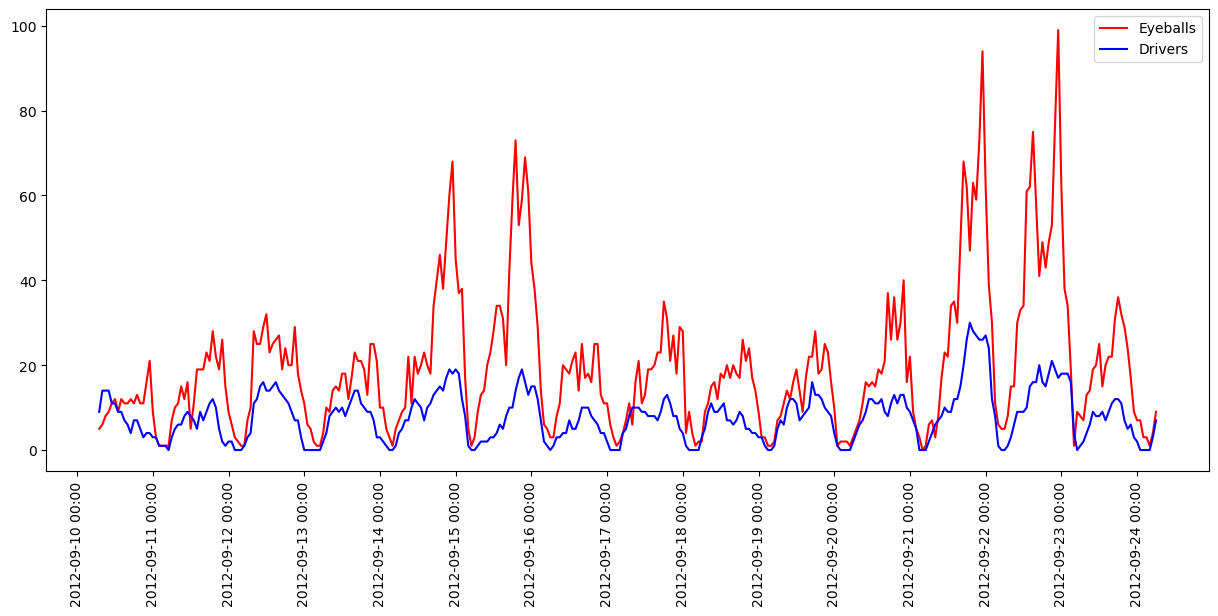

In [75]:
plt.figure(figsize=(15, 6))
plt.plot(df['datetime'], df['Eyeballs '], color='red', label='Eyeballs')
plt.plot(df['datetime'], df['Unique Drivers'], color='blue', label='Drivers')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.legend()
plt.xticks(rotation=90)
plt.show()

### Asnwer: FALSE. Generally, driver supply increases when demand increases but NOT always.

### Q8: In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?

In [77]:
df.set_index('datetime', inplace=True)
df_rolling_sum = df['Zeroes '].rolling('72H').sum().shift(-71)
df_rolling_sum2 = df['Eyeballs '].rolling('72H').sum().shift(-71)

In [79]:
combined = pd.concat([df_rolling_sum, df_rolling_sum2], axis=1)
combined['ratio'] = combined['Zeroes ']/combined['Eyeballs ']
combined.sort_values(ascending=False, by='ratio').head(5)

,Zeroes,Eyeballs,ratio
datetime,,,
2012-09-15 05:00:00,438.0,1495.0,0.292977
2012-09-15 04:00:00,438.0,1499.0,0.292195
2012-09-15 06:00:00,437.0,1496.0,0.292112
2012-09-15 07:00:00,434.0,1495.0,0.290301
2012-09-15 03:00:00,436.0,1512.0,0.288360


### Answer: Highest Zeroes to Eyeballs ratio is: September 15, 2012 5 AM - September 18, 2012 5 AM

### Q9: If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to? 
- Hint: Consider both rider eyeballs and driver supply when choosing

In [81]:
df = df.reset_index()
df.head()

,datetime,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,day_of_week,day,hour_two_digit,ratio
0,2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,Monday,0,07,0.222222
1,2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,Monday,0,08,0.142857
2,2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,Monday,0,09,0.000000
3,2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,Monday,0,10,0.000000
4,2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,Monday,0,11,0.363636


In [38]:
eye_vs_drivers = df.groupby('Time (Local)').agg(total_eyeballs=('Eyeballs ','sum'), total_drivers=('Unique Drivers','sum')).reset_index()
eye_vs_drivers['ratio'] = eye_vs_drivers['total_drivers']/eye_vs_drivers['total_eyeballs']
eye_vs_drivers.sort_values(by='ratio')

,Time (Local),total_eyeballs,total_drivers,ratio
23,23,488,119,0.243852
5,5,42,11,0.261905
22,22,492,144,0.292683
4,4,29,9,0.310345
0,0,339,111,0.327434
21,21,459,155,0.337691
2,2,170,62,0.364706
14,14,332,125,0.376506
18,18,447,174,0.389262
13,13,311,122,0.392283


### Answer: Since, Hour 23 has the lowest driver availability to people looking for rides (Eyeballs), adding 5 more drivers to hour 23 would make most sense to improve that ratio.

### Q10: True or False: There is exactly two weeks of data in this analysis.

In [83]:
df.head()

,datetime,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,day_of_week,day,hour_two_digit,ratio
0,2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,Monday,0,07,0.222222
1,2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,Monday,0,08,0.142857
2,2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,Monday,0,09,0.000000
3,2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,Monday,0,10,0.000000
4,2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,Monday,0,11,0.363636


In [85]:
df['datetime'].min()

Timestamp('2012-09-10 07:00:00')

In [87]:
df['datetime'].max()

Timestamp('2012-09-24 06:00:00')

### Answer 10: TRUE, exactly 14 weeks between Sep 10, 2012 7 AM - Sep 24, 2012 7 AM.

### Q11: Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are supply and demand at both their natural minimums) 
- Tip: Visualize the data to confirm your answer if needed.

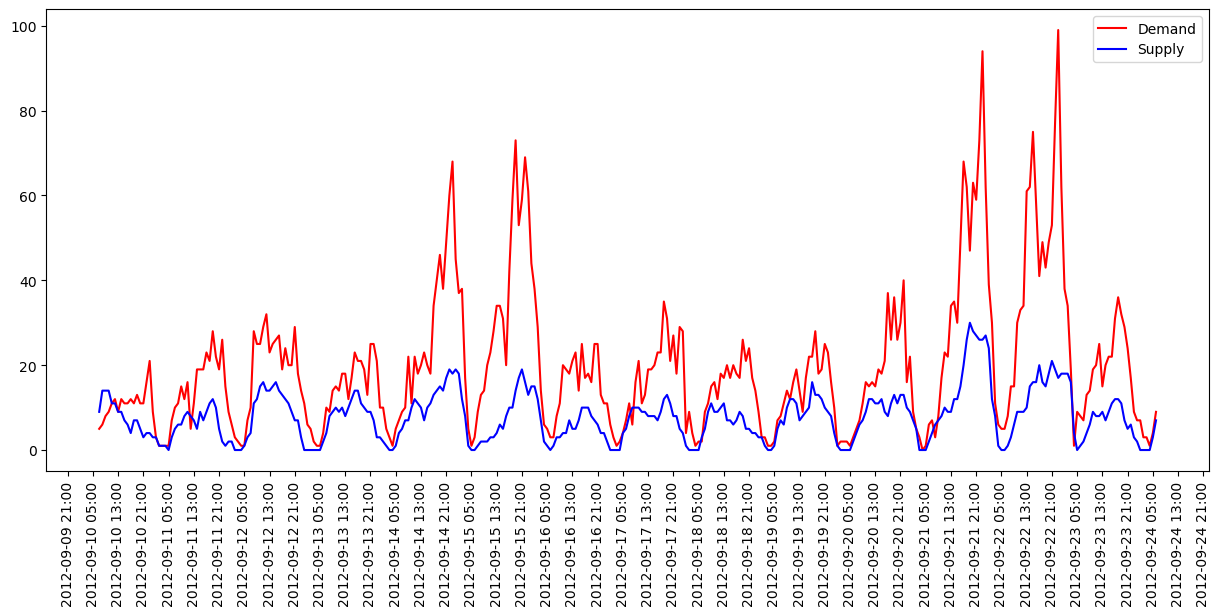

In [89]:
plt.figure(figsize=(15, 6))
plt.plot(df['datetime'], df['Eyeballs '], color='red', label='Demand')
plt.plot(df['datetime'], df['Unique Drivers'], color='blue', label='Supply')
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=8))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [91]:
minimum = df.groupby(['Date','Time (Local)']).agg(total_eyeballs=('Eyeballs ','sum'),total_drivers=('Unique Drivers','sum')).reset_index()

In [93]:
minimum['Rank_eye'] = minimum.groupby('Date')['total_eyeballs'].rank(ascending=True)
minimum['Rank_dri'] = minimum.groupby('Date')['total_drivers'].rank(ascending=True)
minimum

,Date,Time (Local),total_eyeballs,total_drivers,Rank_eye,Rank_dri
0,10-Sep-12,7,5,9,1.0,11.0
1,10-Sep-12,8,6,14,2.0,16.0
2,10-Sep-12,9,8,14,3.0,16.0
3,10-Sep-12,10,9,14,4.5,16.0
4,10-Sep-12,11,11,11,8.5,13.5
...,...,...,...,...,...,...
331,24-Sep-12,2,3,0,2.5,2.5
332,24-Sep-12,3,3,0,2.5,2.5
333,24-Sep-12,4,1,0,1.0,2.5
334,24-Sep-12,5,4,3,4.0,6.0


In [95]:
minimum[minimum['Rank_eye'].isin([1,2])]['Time (Local)'].value_counts(ascending=False)

Time (Local)
4    6
7    2
3    2
5    2
8    1
6    1
Name: count, dtype: int64

In [97]:
minimum[minimum['Rank_dri'].isin([1,2])]['Time (Local)'].value_counts(ascending=False)

Time (Local)
5     3
3     2
4     2
6     2
21    1
2     1
Name: count, dtype: int64

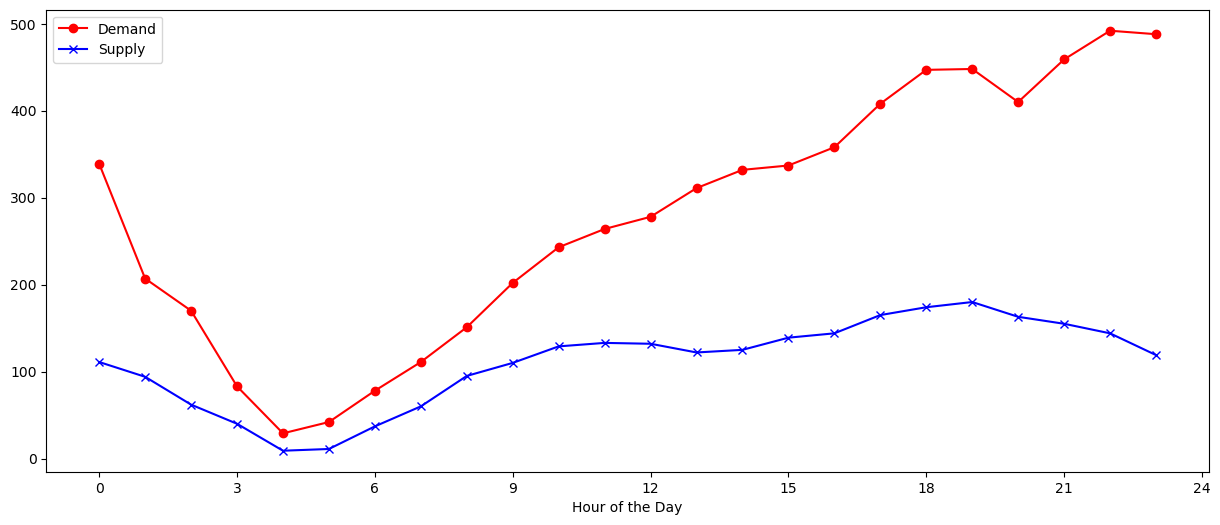

In [99]:
minimum2 = df.groupby(['Time (Local)']).agg(total_eyeballs=('Eyeballs ','sum'),total_drivers=('Unique Drivers','sum')).reset_index()
plt.figure(figsize=(15, 6))
plt.plot(minimum2['Time (Local)'], minimum2['total_eyeballs'], color='red', label='Demand', marker='o')
plt.plot(minimum2['Time (Local)'], minimum2['total_drivers'], color='blue', label='Supply', marker='x')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Hour of the Day')
plt.legend() 
plt.show()

### Answer: From the graphs and rank analysis, we see the supply and demand is at minimum in early hours of morning, between 4 AM - 5 AM. Hence, instead of midnight, this should be the "true end" day.